In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'DEC 2022 BELGAUM.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2022,1,22.70,18.73,27.38,16.11,1.91,93.76,1.58
1,2022,2,22.65,19.87,27.01,15.99,0.32,93.84,1.59
2,2022,3,22.08,19.00,26.15,15.93,1.53,93.90,1.91
3,2022,4,21.01,16.51,26.65,13.79,0.16,93.87,2.35
4,2022,5,19.44,14.62,25.76,12.33,0.02,93.85,2.09


In [ ]:
data.shape


(31, 9)

In [ ]:
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
0,2022,1,22.70,18.73,27.38,16.11,1.91,1.58
1,2022,2,22.65,19.87,27.01,15.99,0.32,1.59
2,2022,3,22.08,19.00,26.15,15.93,1.53,1.91
3,2022,4,21.01,16.51,26.65,13.79,0.16,2.35
4,2022,5,19.44,14.62,25.76,12.33,0.02,2.09


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2022.0,16.000000,21.030323,16.406452,26.719032,13.520645,0.937419,1.817742
std,0.0,9.092121,1.468413,2.358479,1.217794,1.883621,1.920953,0.406503
min,2022.0,1.000000,17.400000,11.400000,23.370000,9.520000,0.000000,0.910000
25%,2022.0,8.500000,19.705000,14.255000,26.065000,11.930000,0.000000,1.585000
50%,2022.0,16.000000,21.570000,16.510000,26.910000,13.790000,0.130000,1.730000
75%,2022.0,23.500000,22.225000,18.650000,27.610000,15.410000,0.845000,2.075000
max,2022.0,31.000000,22.700000,19.870000,28.370000,16.110000,7.780000,2.980000


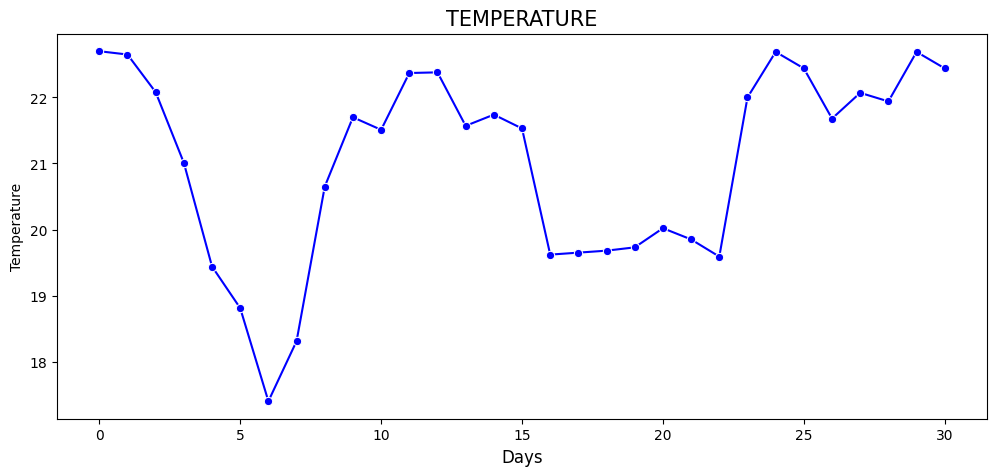

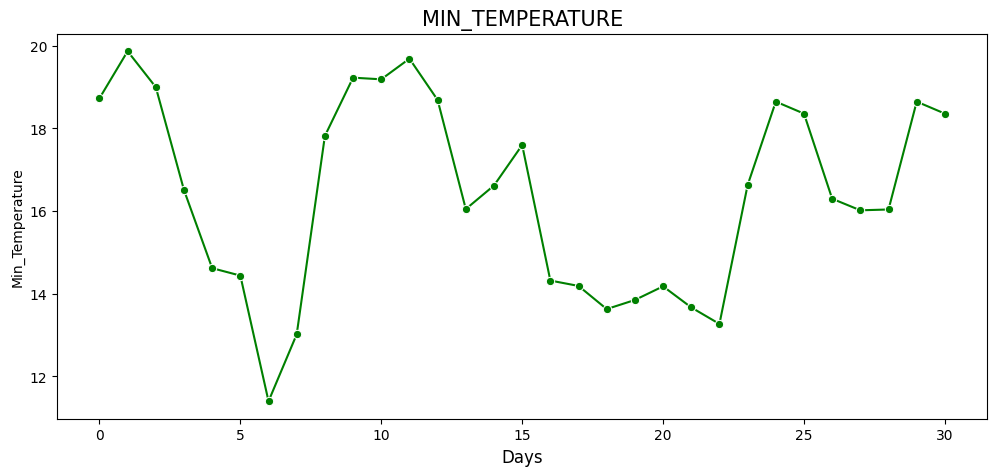

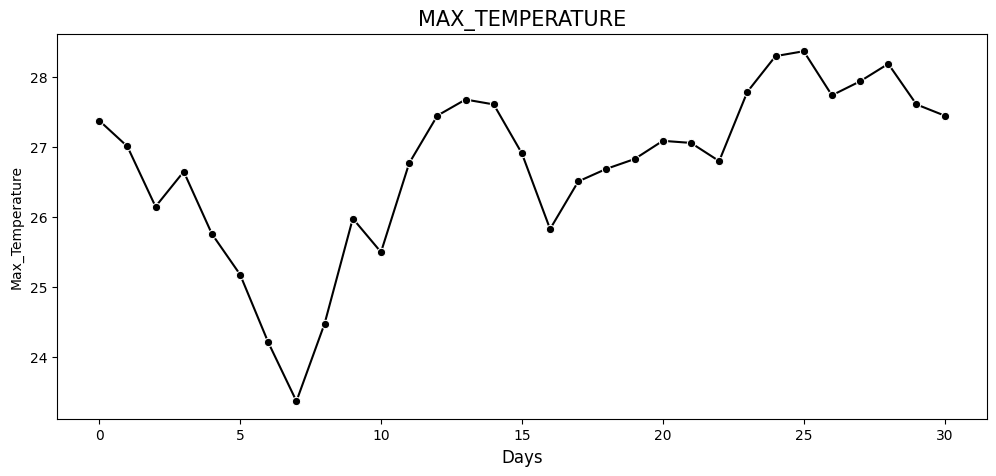

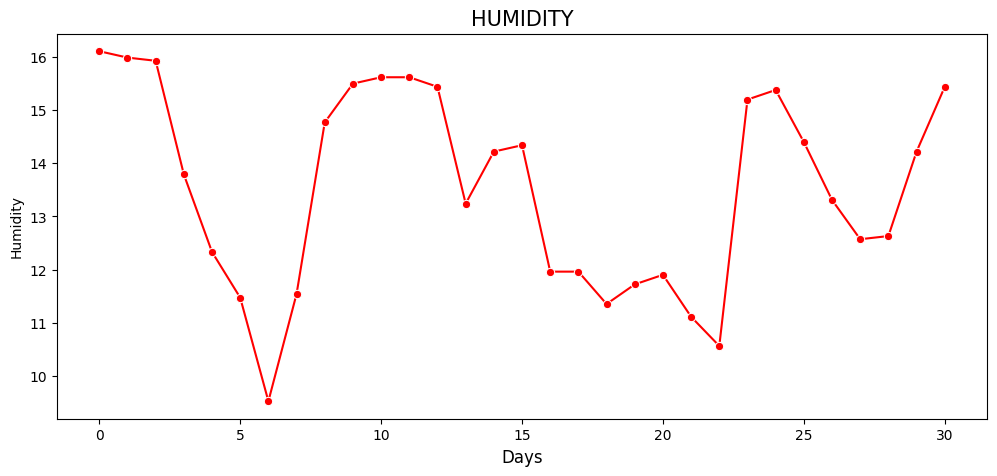

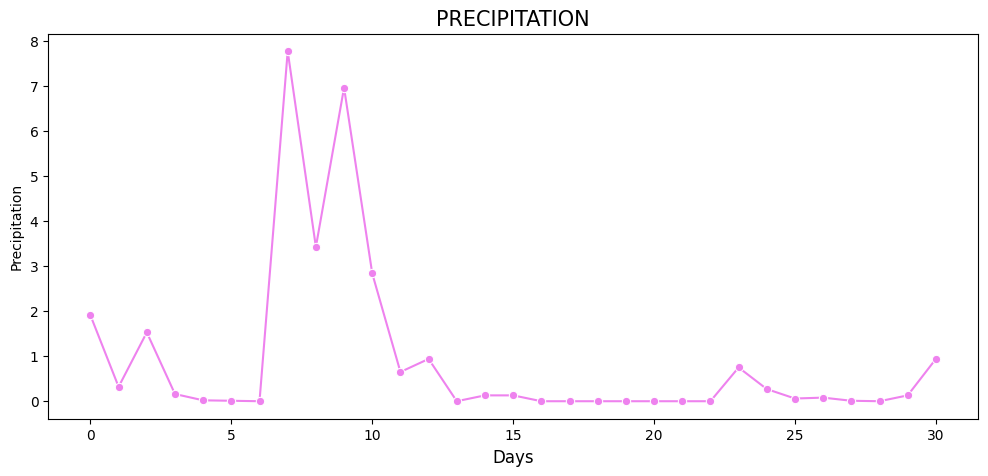

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


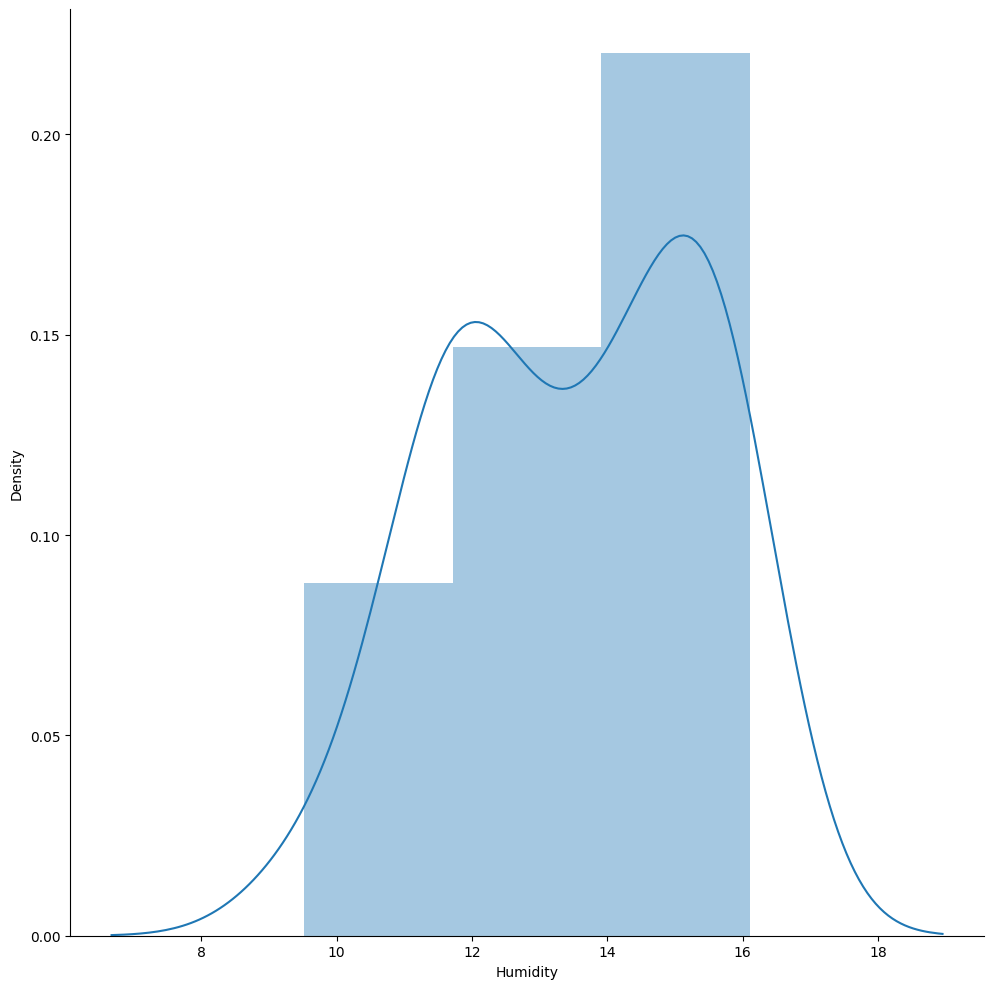

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

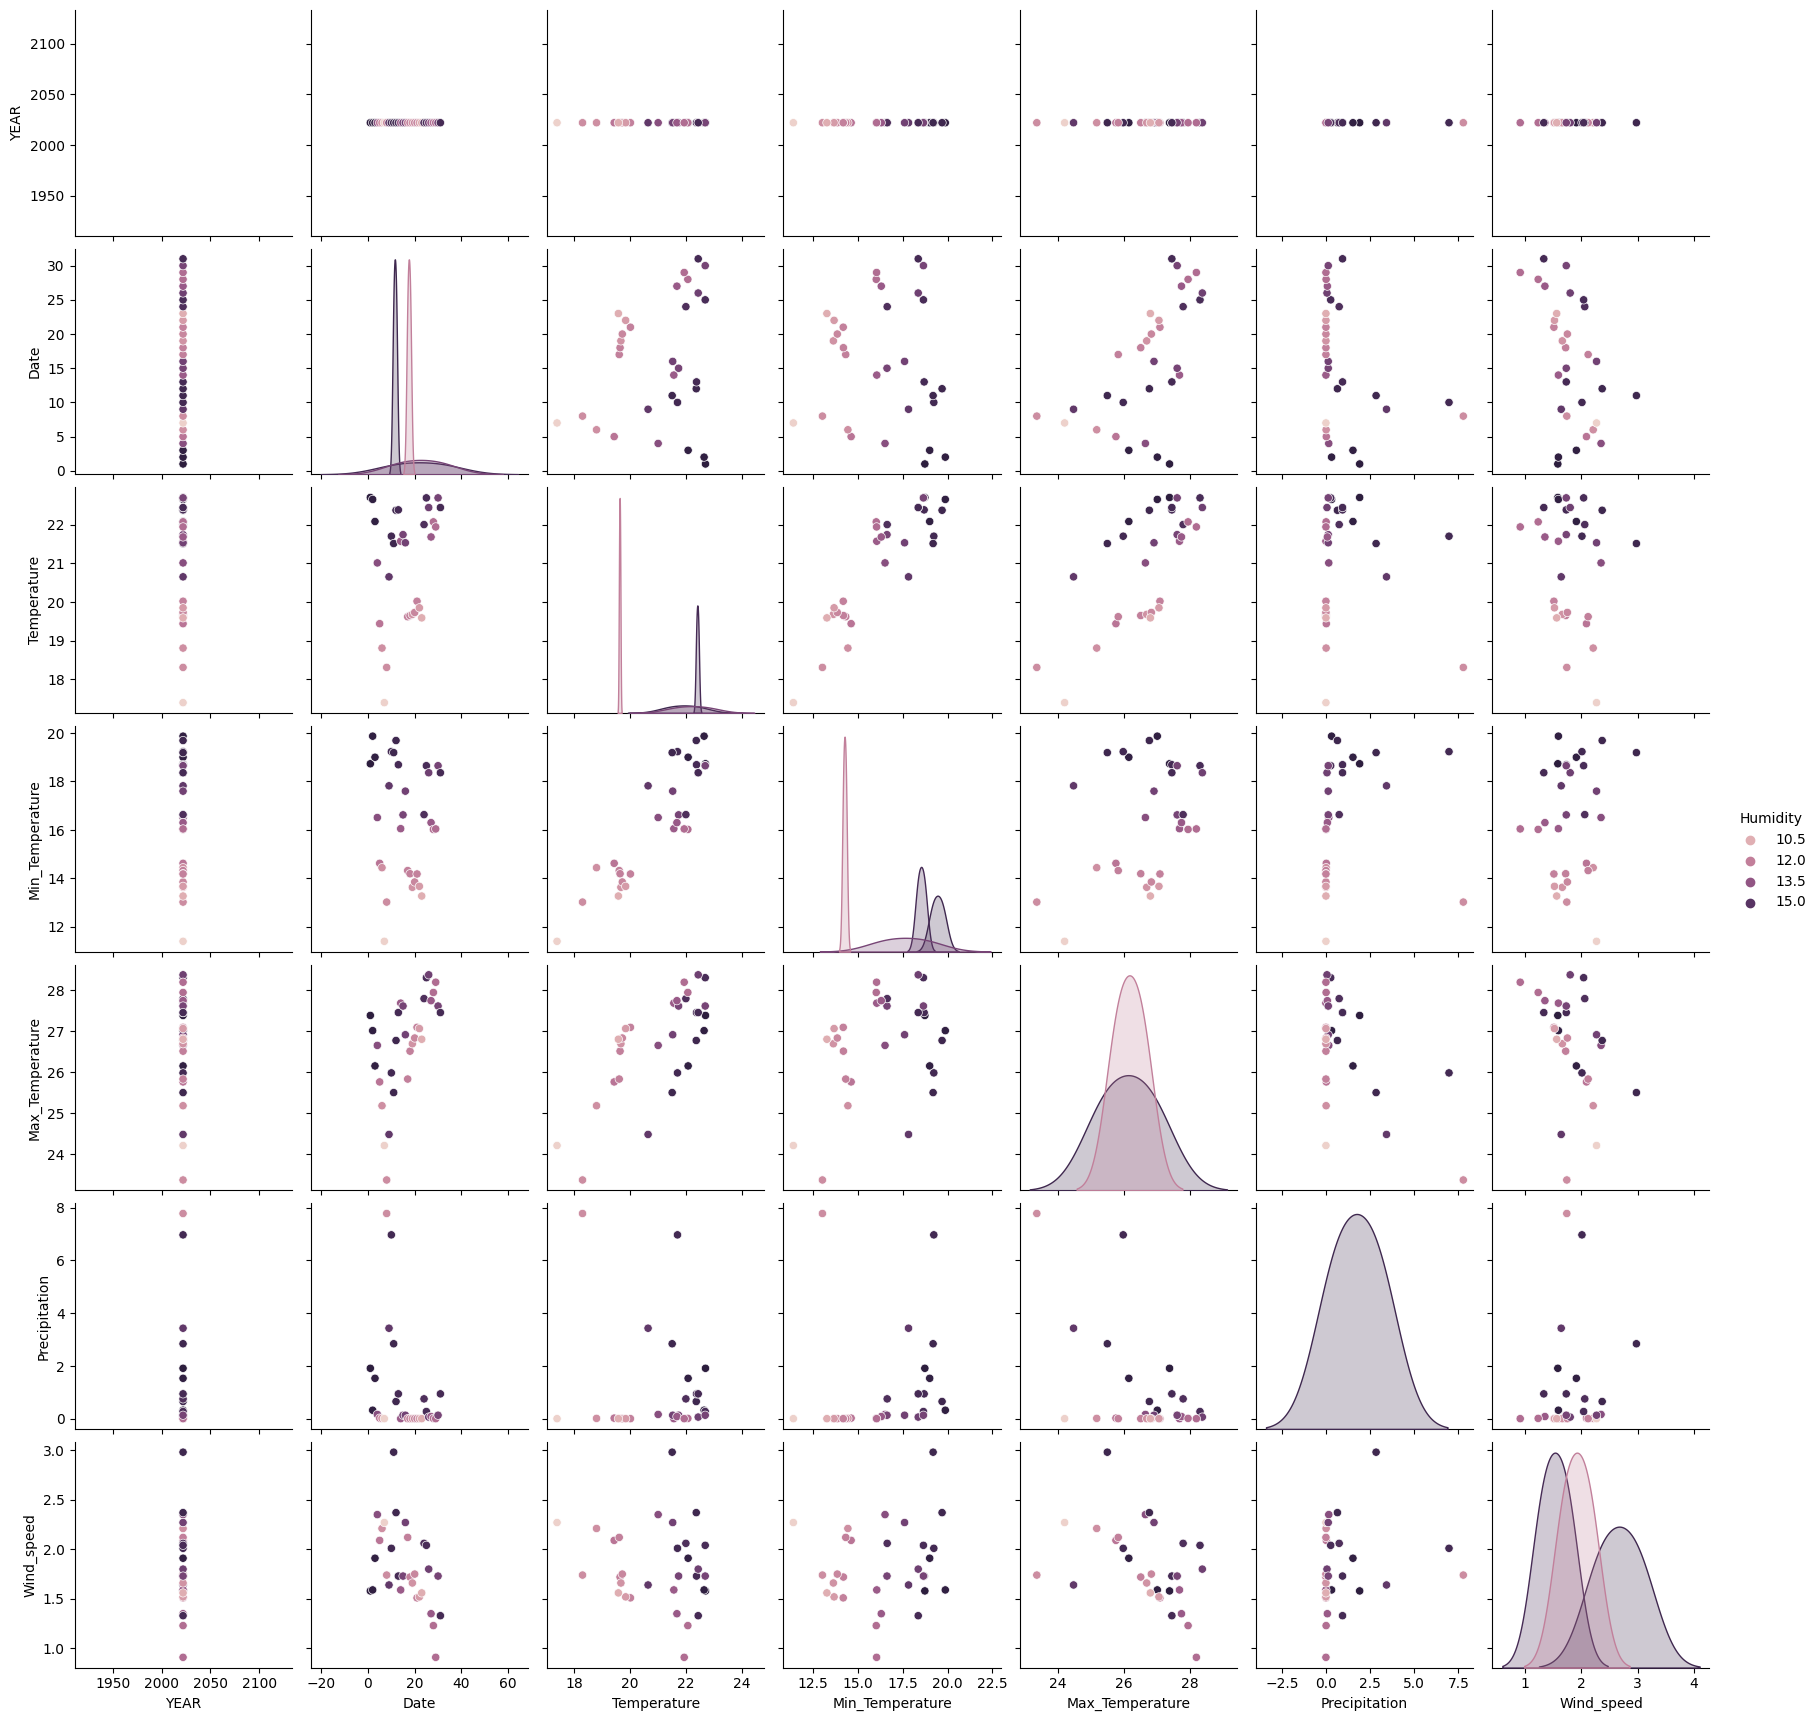

In [ ]:
sns.pairplot(data,hue="Humidity")

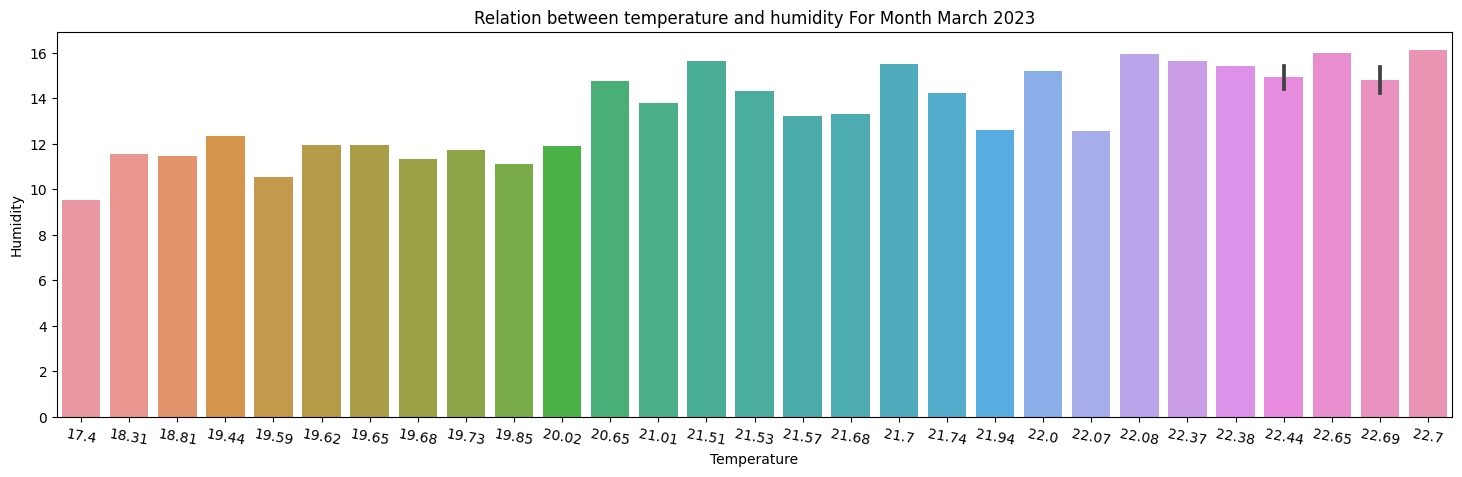

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

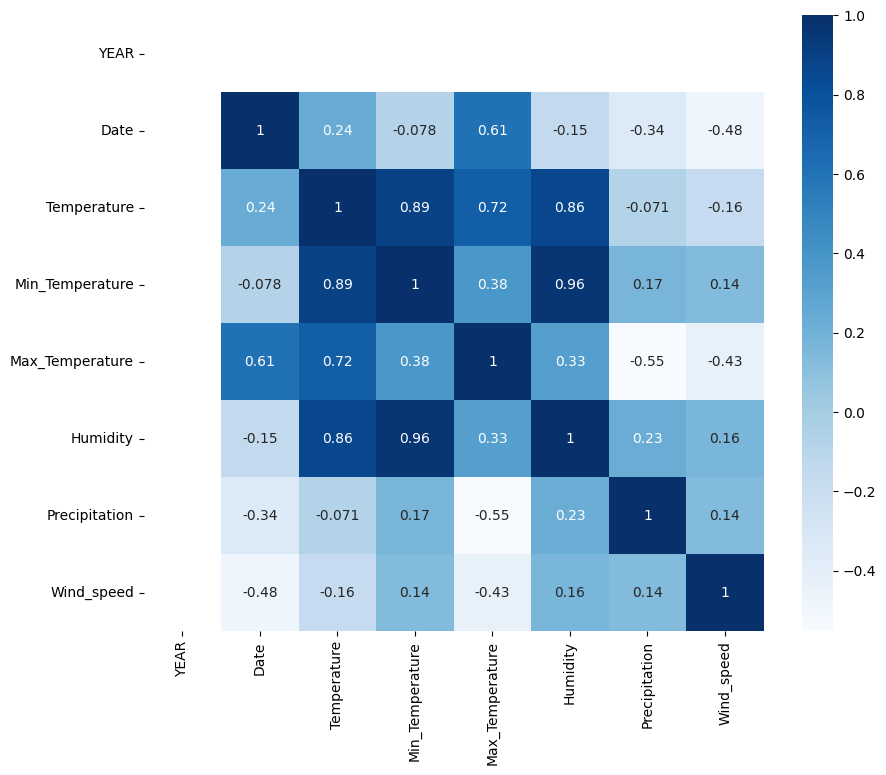

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

**Humidity** (Create a pivot table to aggregate humidity by date & Heatmap Using Seaborn)

<Axes: ylabel='Date'>

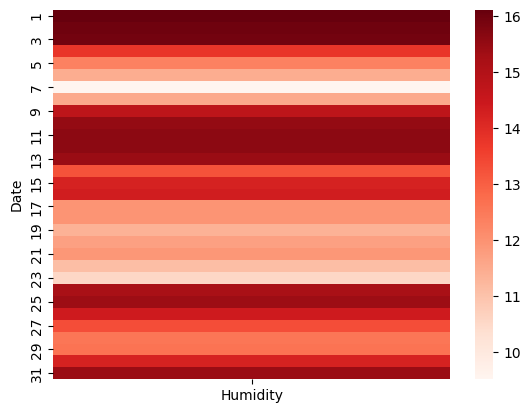

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

Temperature

<Axes: ylabel='Date'>

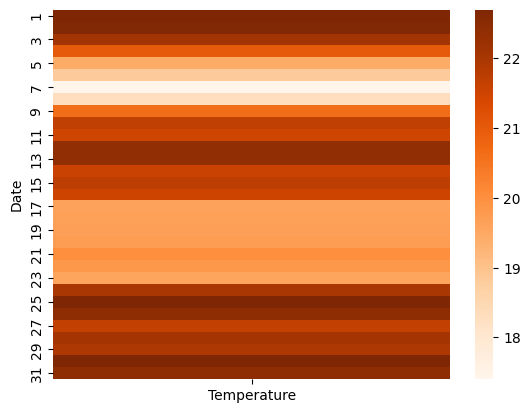

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_speed
0,22.70,16.11,1.91,1.58
1,22.65,15.99,0.32,1.59
2,22.08,15.93,1.53,1.91
3,21.01,13.79,0.16,2.35
4,19.44,12.33,0.02,2.09
5,18.81,11.47,0.01,2.21
6,17.40,9.52,0.00,2.27
7,18.31,11.54,7.78,1.74
8,20.65,14.77,3.43,1.64
9,21.70,15.50,6.97,2.01


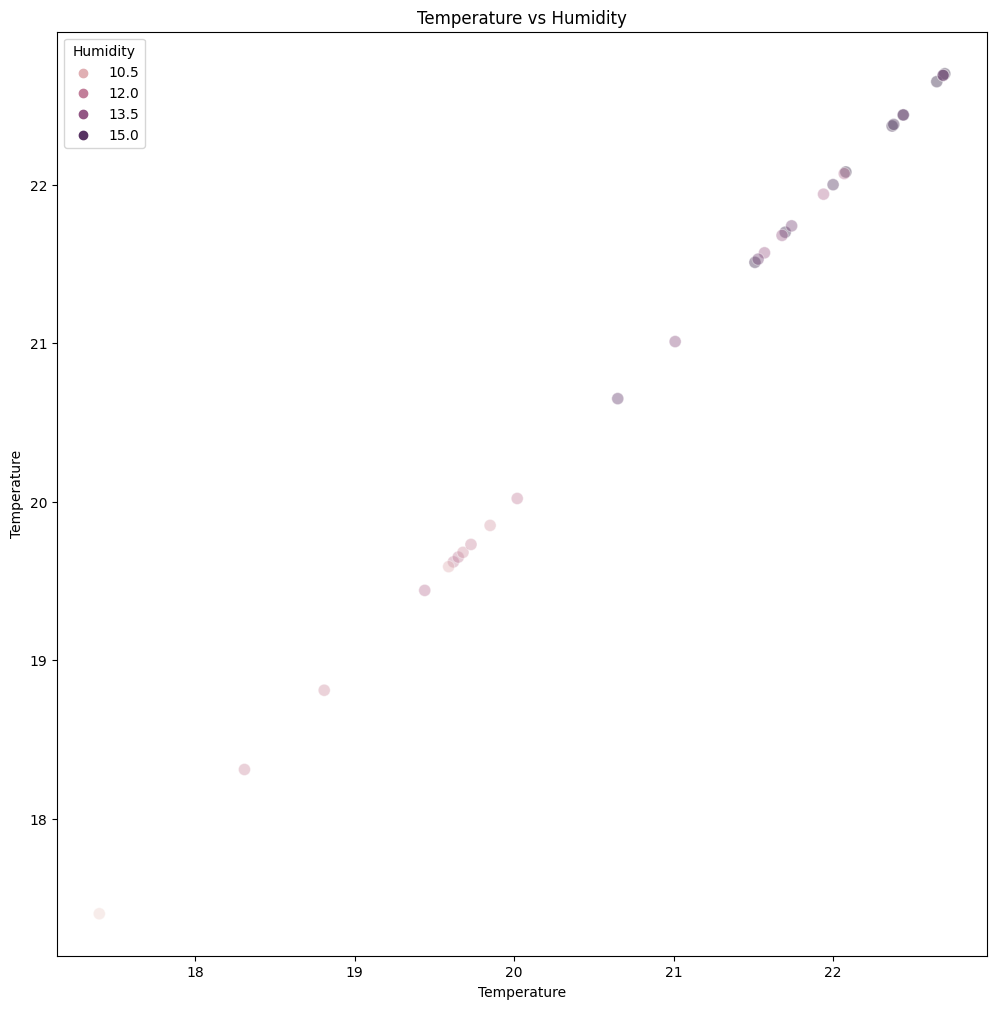

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

DAYS-WISE ANALYSIS

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

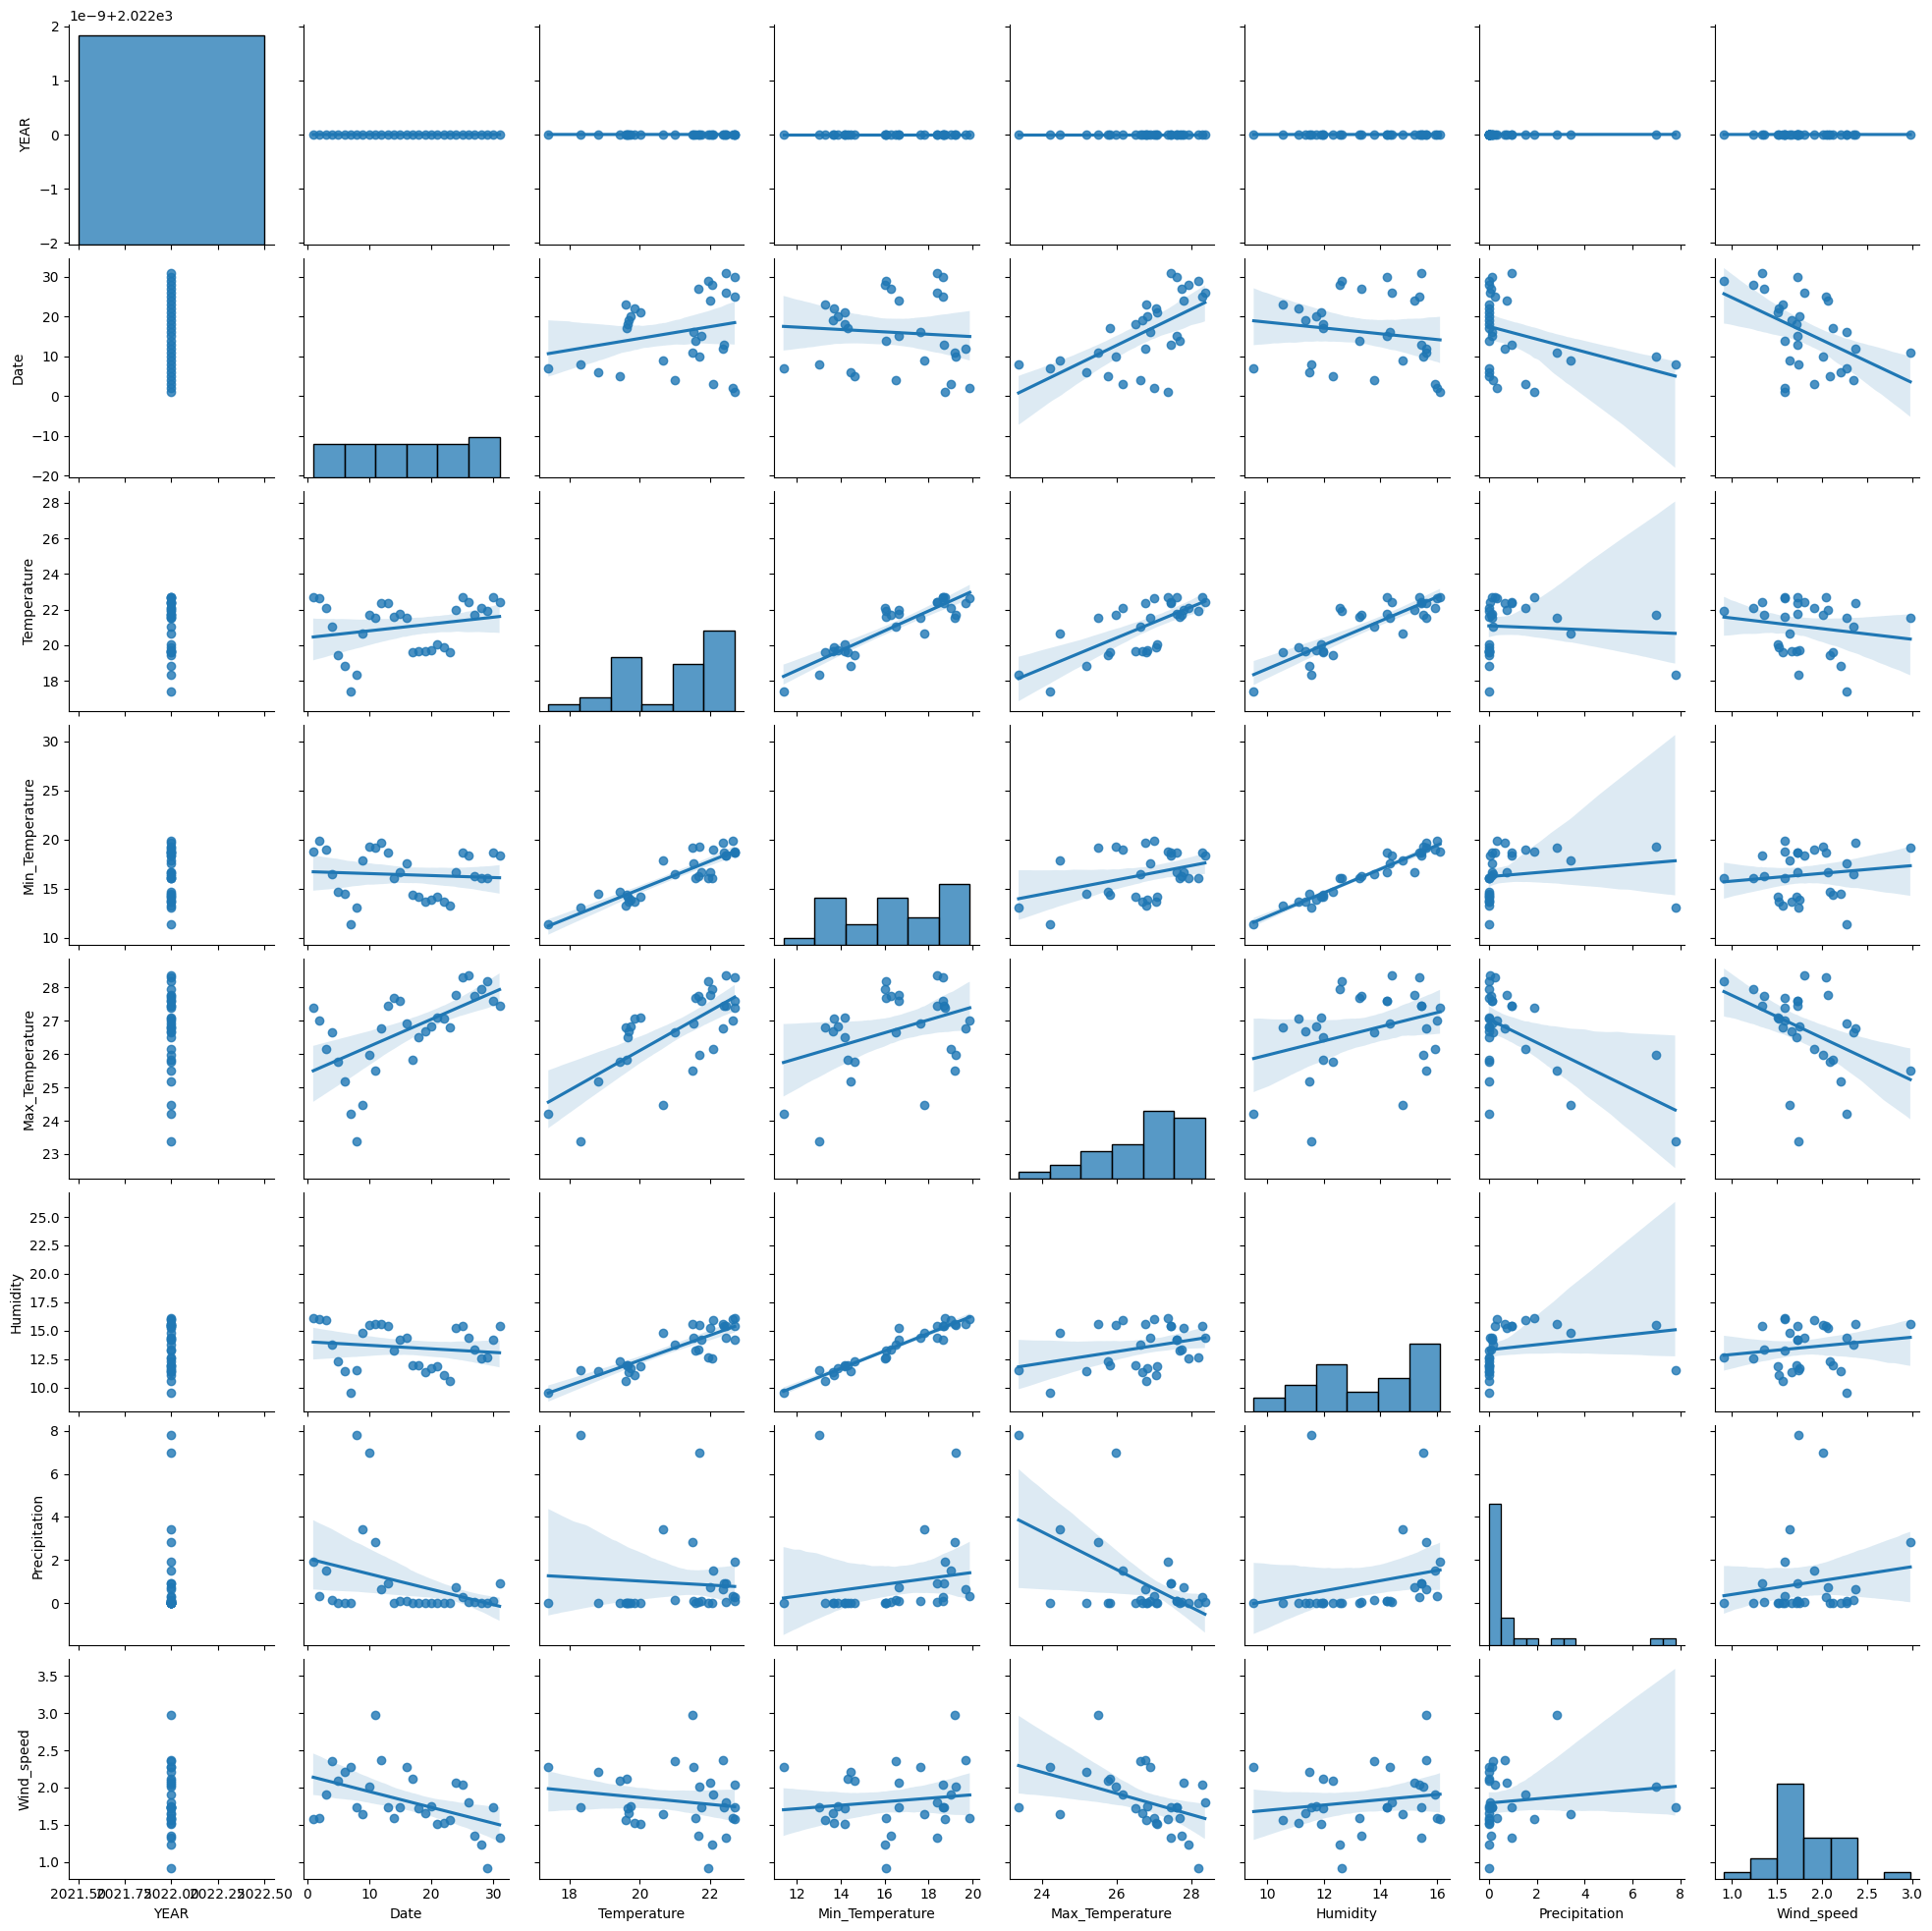

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

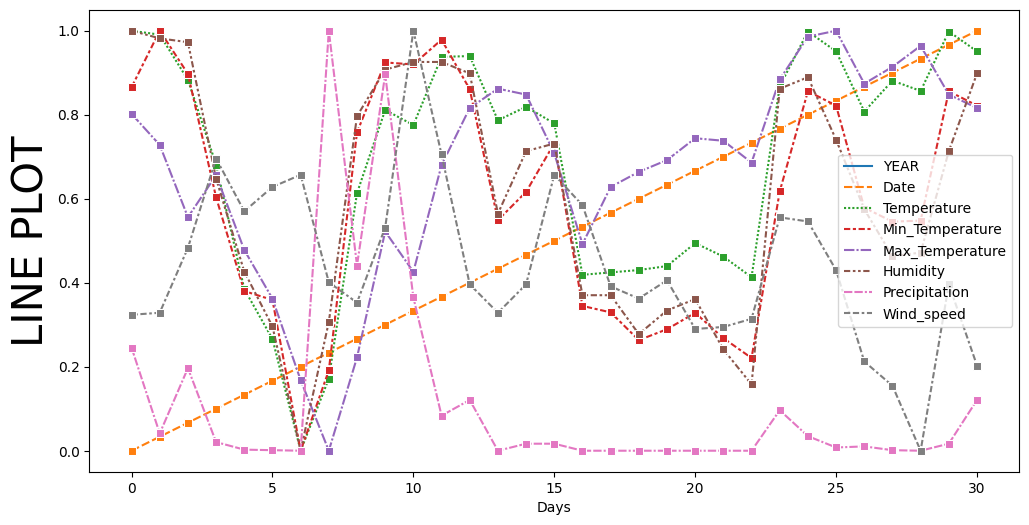

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

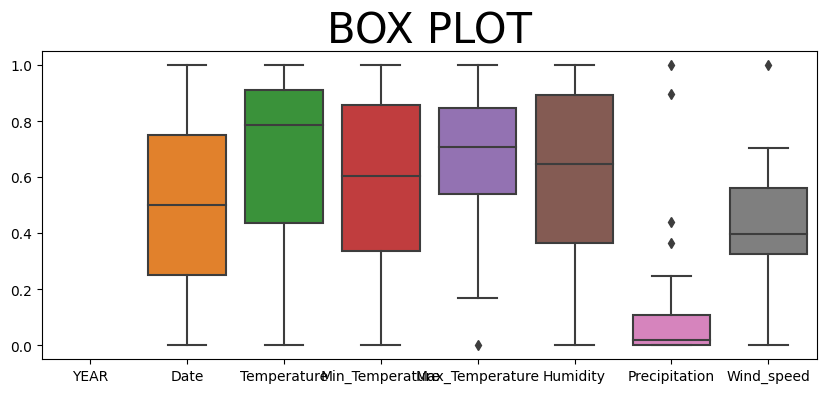

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

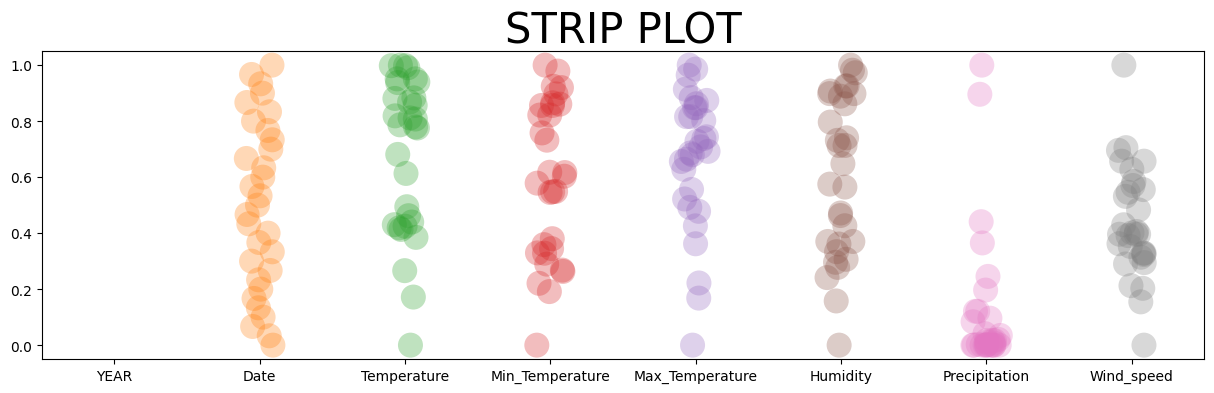

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()